#Thêm thư viện

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Đọc dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
raw_data=pd.read_csv('/content/drive/My Drive/database-DoAnCoSoKhoaHocDuLieu/kc_house_data.csv')

In [ ]:
raw_data.head(20)

id             date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  20141013T000000   221900.0         3       1.00         1180   
1   6414100192  20141209T000000   538000.0         3       2.25         2570   
2   5631500400  20150225T000000   180000.0         2       1.00          770   
3   2487200875  20141209T000000   604000.0         4       3.00         1960   
4   1954400510  20150218T000000   510000.0         3       2.00         1680   
5   7237550310  20140512T000000  1225000.0         4       4.50         5420   
6   1321400060  20140627T000000   257500.0         3       2.25         1715   
7   2008000270  20150115T000000   291850.0         3       1.50         1060   
8   2414600126  20150415T000000   229500.0         3       1.00         1780   
9   3793500160  20150312T000000   323000.0         3       2.50         1890   
10  1736800520  20150403T000000   662500.0         3       2.50         3560   
11  9212900260  20140527T000000   468000.0         2       1.00         1160   
12   114101516  20140528T000000   310000.0         3       1.00         1430   
13  6054650070  20141007T000000   400000.0         3       1.75         1370   
14  1175000570  20150312T000000   530000.0         5       2.00         1810   
15  9297300055  20150124T000000   650000.0         4       3.00         2950   
16  1875500060  20140731T000000   395000.0         3       2.00         1890   
17  6865200140  20140529T000000   485000.0         4       1.00         1600   
18    16000397  20141205T000000   189000.0         2       1.00         1200   
19  7983200060  20150424T000000   230000.0         3       1.00         1250   

    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0       5650     1.0           0     0  ...      7        1180              0   
1       7242     2.0           0     0  ...      7        2170            400   
2      10000     1.0           0     0  ...      6         770              0   
3       5000     1.0           0     0  ...      7        1050            910   
4       8080     1.0           0     0  ...      8        1680              0   
5     101930     1.0           0     0  ...     11        3890           1530   
6       6819     2.0           0     0  ...      7        1715              0   
7       9711     1.0           0     0  ...      7        1060              0   
8       7470     1.0           0     0  ...      7        1050            730   
9       6560     2.0           0     0  ...      7        1890              0   
10      9796     1.0           0     0  ...      8        1860           1700   
11      6000     1.0           0     0  ...      7         860            300   
12     19901     1.5           0     0  ...      7        1430              0   
13      9680     1.0           0     0  ...      7        1370              0   
14      4850     1.5           0     0  ...      7        1810              0   
15      5000     2.0           0     3  ...      9        1980            970   
16     14040     2.0           0     0  ...      7        1890              0   
17      4300     1.5           0     0  ...      7        1600              0   
18      9850     1.0           0     0  ...      7        1200              0   
19      9774     1.0           0     0  ...      7        1250              0   

    yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0       1955             0    98178  47.5112 -122.257           1340   
1       1951          1991    98125  47.7210 -122.319           1690   
2       1933             0    98028  47.7379 -122.233           2720   
3       1965             0    98136  47.5208 -122.393           1360   
4       1987             0    98074  47.6168 -122.045           1800   
5       2001             0    98053  47.6561 -122.005           4760   
6       1995             0    98003  47.3097 -122.327           2238   
7       1963             0    98198  47.4095 -122.315

In [ ]:
#Check null values
raw_data.shape

(21613, 21)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
raw_data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [ ]:
raw_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#Thăm do dữ liệu

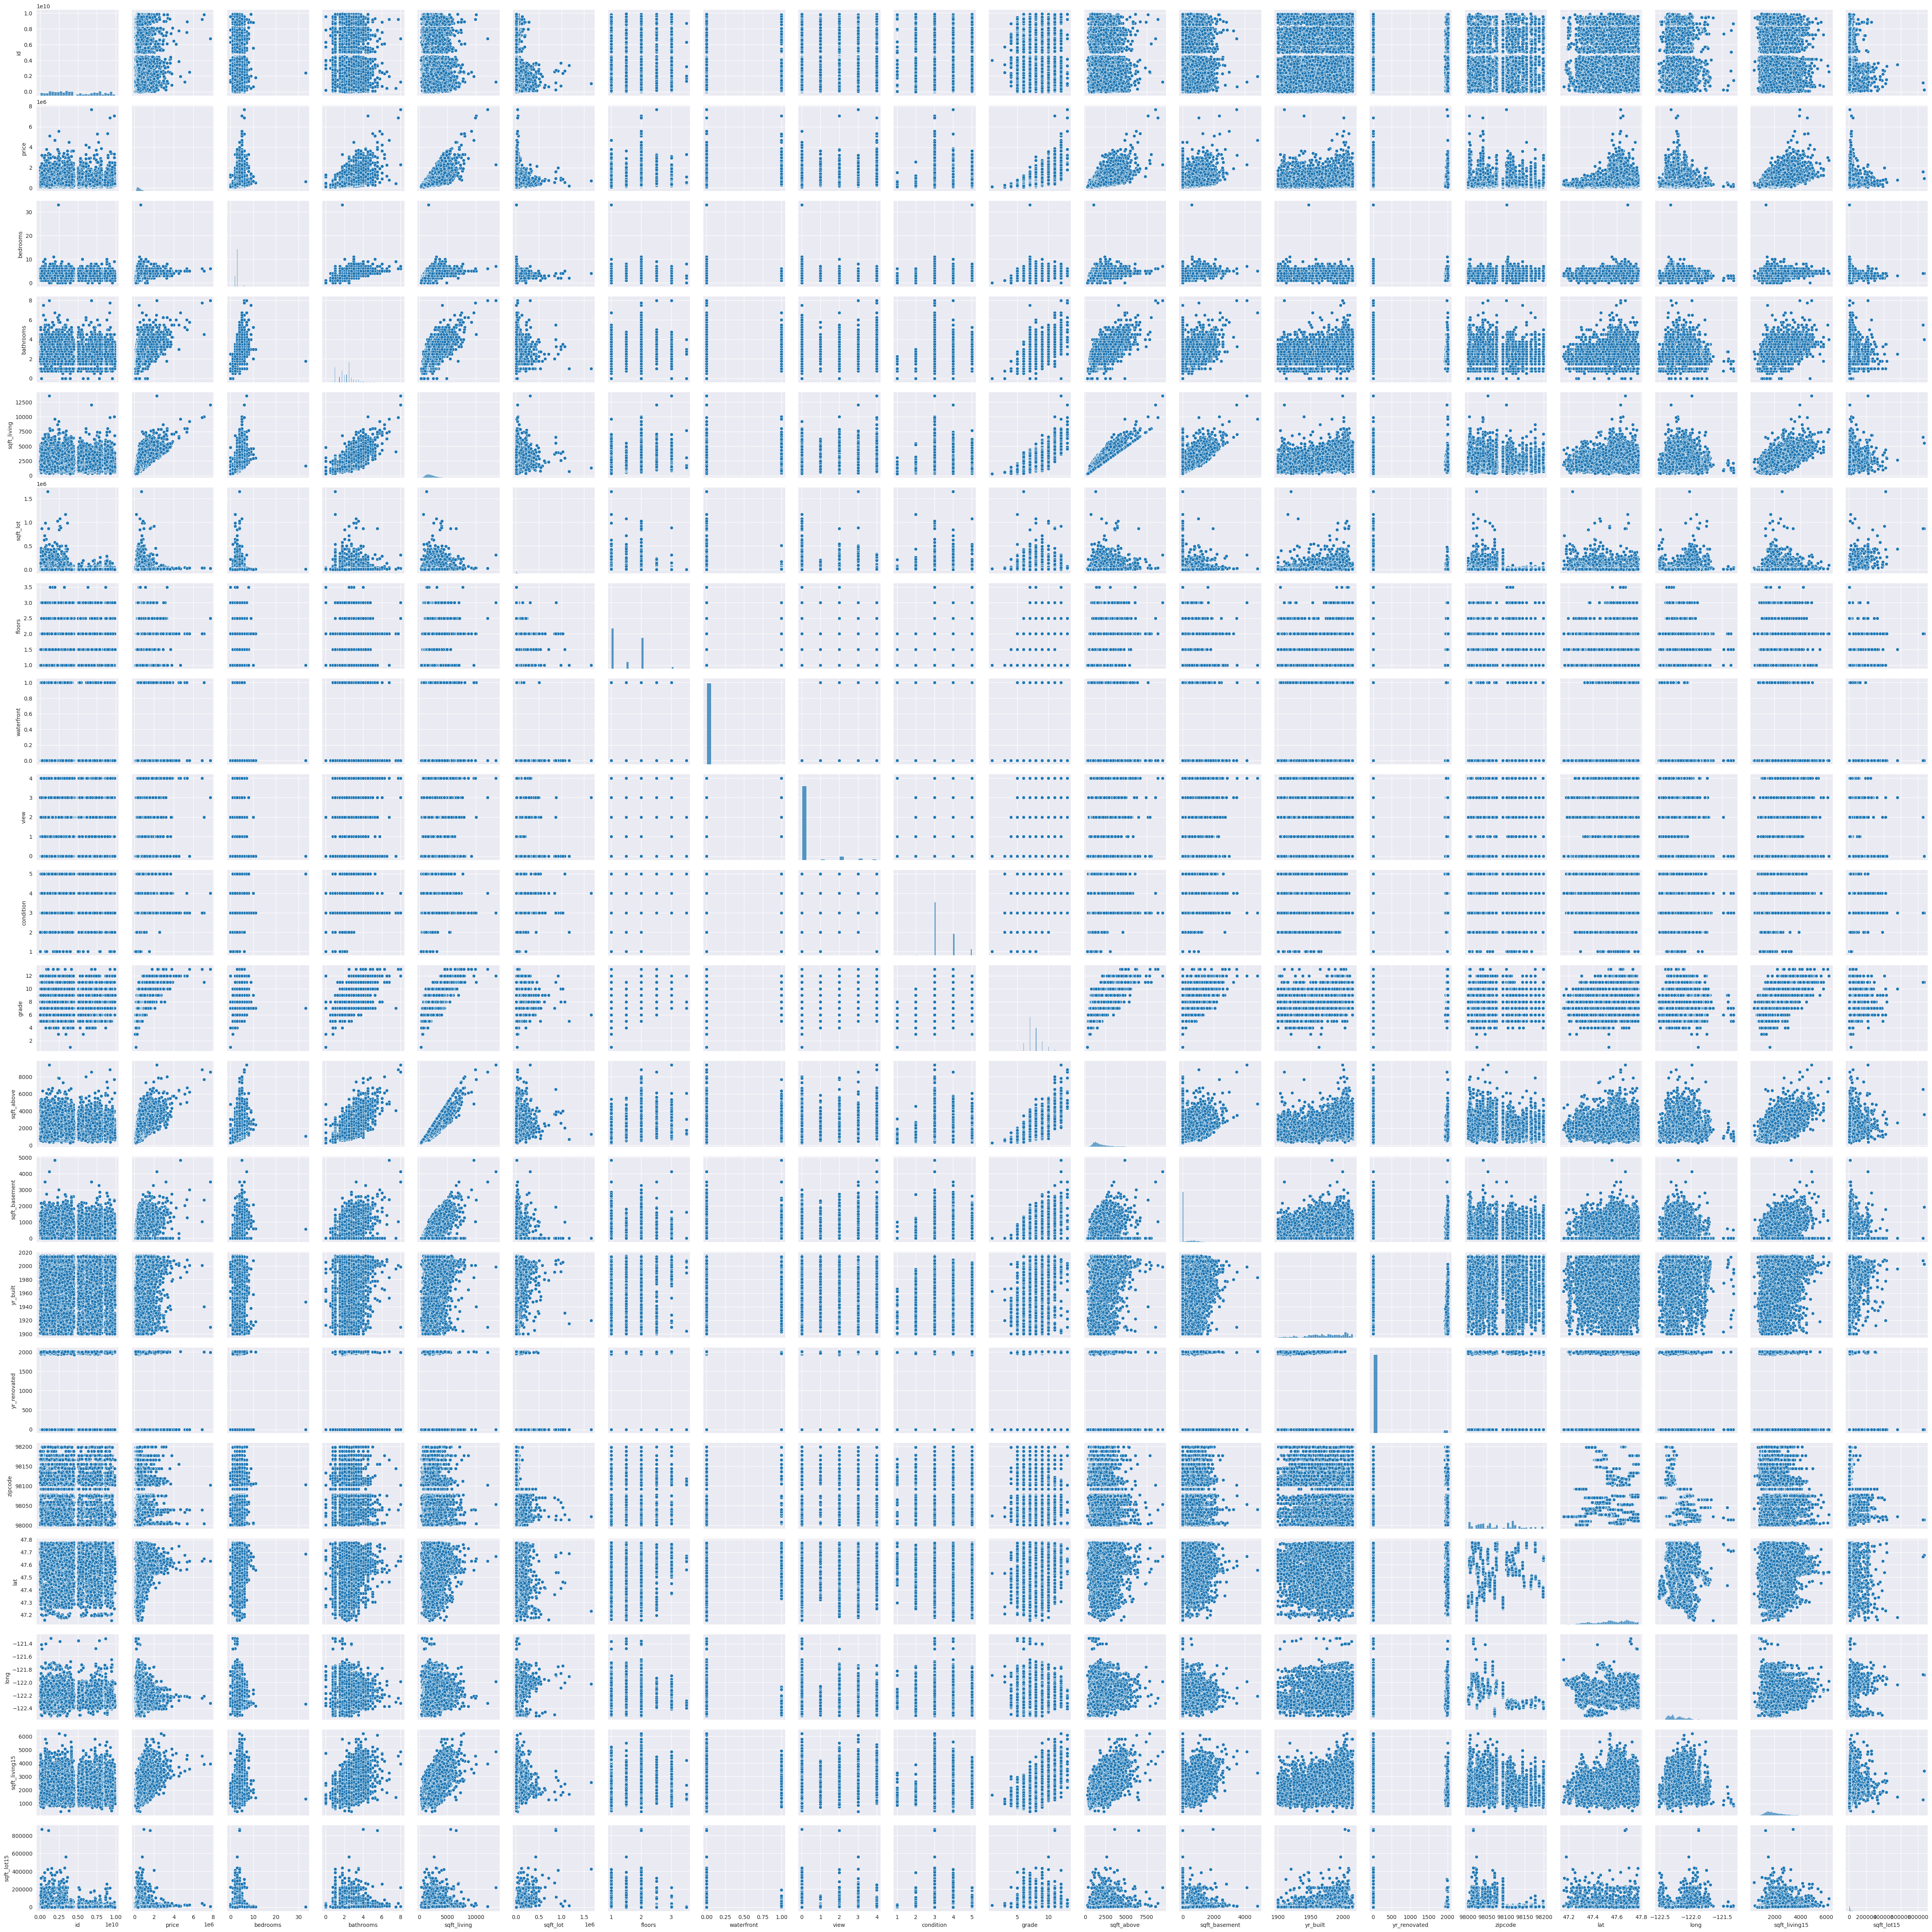

In [ ]:
sns.pairplot(raw_data)

<Axes: xlabel='price', ylabel='Density'>

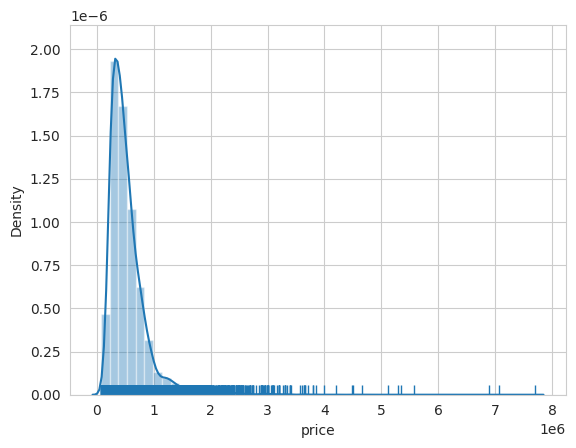

In [ ]:
sns.set_style("whitegrid")
sns.distplot(raw_data['price'], kde= True, rug = "True")

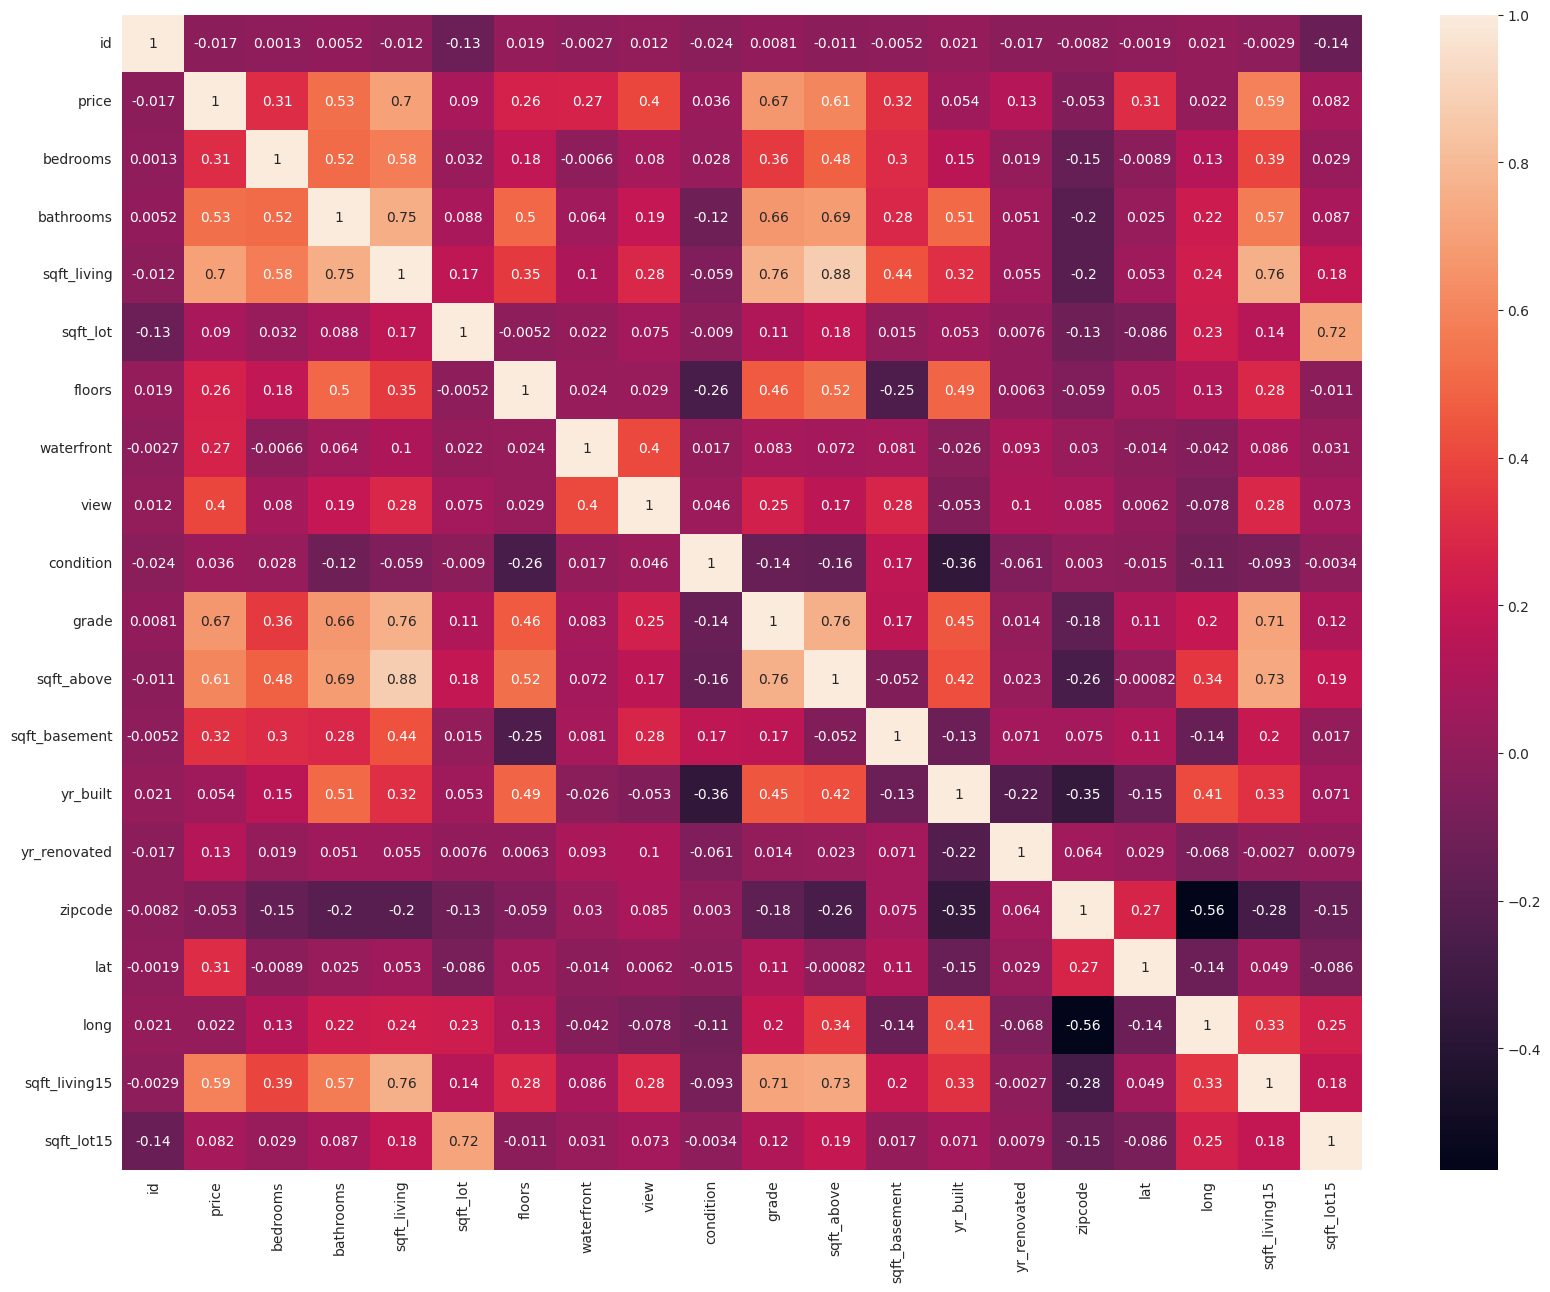

In [ ]:
cormap = raw_data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cormap, annot=True)
plt.show()

#Mô tả dữ liệu

# Tiền xử lý dữ liệu

In [ ]:
#Loại bỏ các cột không cần thiết cho việc dự đoán (cụ thể là 'id')
drop_cols = ['id']
data = raw_data.drop(drop_cols, axis = 1)
target = data['price']
data = data.drop(['price'], axis = 1)
data.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  20141013T000000         3       1.00         1180      5650     1.0   
1  20141209T000000         3       2.25         2570      7242     2.0   
2  20150225T000000         2       1.00          770     10000     1.0   
3  20141209T000000         4       3.00         1960      5000     1.0   
4  20150218T000000         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [ ]:
# Chia cột date thành các cột cụ thể (day, mont, year) để dễ dàng hơn trong việc xử lý dữ liệu

# Chuyển đổi cột date thành dạng datetime
data['date'] = pd.to_datetime(data['date'])
# Tách thuộc tích datetime thành từng cột cụ thể
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
# Xóa cột Date ban đầu
data = data.drop("date",axis=1)

data.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  ...  yr_built  yr_renovated  zipcode  \
0          3      7        1180  ...      1955             0    98178   
1          3      7        2170  ...      1951          1991    98125   
2          3      6         770  ...      1933             0    98028   
3          5      7        1050  ...      1965             0    98136   
4          3      8        1680  ...      1987             0    98074   

       lat     long  sqft_living15  sqft_lot15  year  month  day  
0  47.5112 -122.257           1340        5650  2014     10   13  
1  47.7210 -122.319           1690        7639  2014     12    9  
2  47.7379 -122.233           2720        8062  2015      2   25  
3  47.5208 -122.393           1360        5000  2014     12    9  
4  47.6168 -122.045           1800        7503  2015      2   18  

[5 rows x 21 columns]

In [ ]:
#Tách dữ liệu để training

X_train, X_test, y_train, y_test = \
    train_test_split(data, target, random_state=42, train_size=0.8, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(
    X_train.shape[0], X_test.shape[0], data.shape[0])
)

train size=17290, test_size=4323, total_size=21613


In [ ]:
# Sử dụng Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Quality Test 39097299121.54098
Quality Control 44951491944.93018


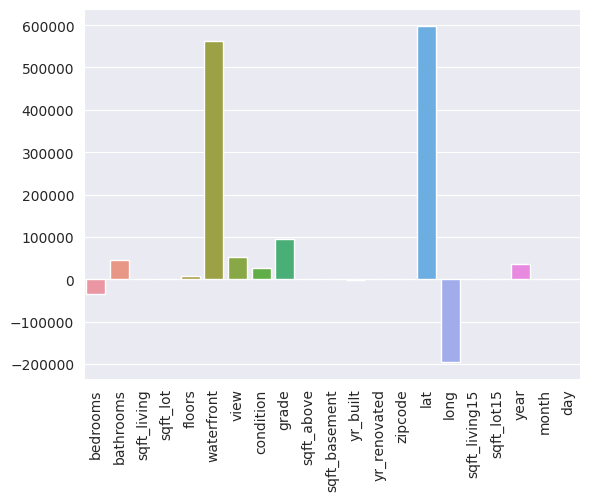

In [ ]:
y_pred_train = model.predict(X_train)
print("Quality Test {}".format(mean_squared_error(y_train, y_pred_train)))
y_pred = model.predict(X_test)
print("Quality Control {}".format(mean_squared_error(y_test, y_pred)))

sns.barplot(x = X_train.columns, y=model.coef_)
plt.xticks(rotation=90);

In [ ]:
print("Linear regression r2 score: ", r2_score(y_test,y_pred)*100)

Linear regression r2 score:  70.26559760834365


In [ ]:
# Hệ số coeff
coeff_df = pd.DataFrame(model.coef_,data.columns , columns=['Coefficient'])
coeff_df

Coefficient
bedrooms       -34500.244457
bathrooms       44645.781726
sqft_living       109.075885
sqft_lot            0.085875
floors           7520.144435
waterfront     563025.997680
view            53411.743084
condition       25847.317823
grade           94723.869327
sqft_above         70.025018
sqft_basement      39.050867
yr_built        -2675.529833
yr_renovated       21.639129
zipcode          -553.708536
lat            598270.535201
long          -195001.856526
sqft_living15      21.347779
sqft_lot15         -0.327378
year            36199.605239
month            1139.200266
day              -347.904822

Text(0, 0.5, 'Giá thực tế')

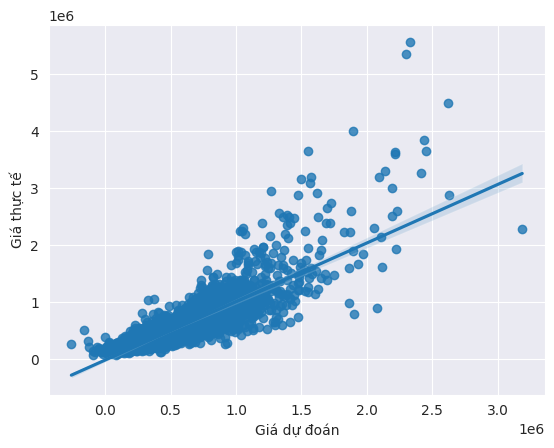

In [ ]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Giá dự đoán")
plt.ylabel(("Giá thực tế"))

In [ ]:
from sklearn import metrics
predictions = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt( metrics.mean_squared_error(y_test, predictions)))
# Sử dụng chỉ số RMSE cho thấy giá trị chênh lệch trung bình của giá dự đoán từ mô hình và giá trị thực tế là 212.017 $

MAE: 126929.17347036298
MSE: 44951491944.93018
RMSE: 212017.6689451381


In [ ]:
#Sử dụng mô hình Cufflinks để trực quan hóa hơn
import cufflinks as cf
cf.go_offline()
import plotly.io as pio
pio.renderers.default="colab"
pd.DataFrame({"Giá dự đoán": predictions, "Giá ban đầu": y_test}).iplot(mode="markers")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  year  

In [ ]:
data.head(5)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  ...  yr_built  yr_renovated  zipcode  \
0          3      7        1180  ...      1955             0    98178   
1          3      7        2170  ...      1951          1991    98125   
2          3      6         770  ...      1933             0    98028   
3          5      7        1050  ...      1965             0    98136   
4          3      8        1680  ...      1987             0    98074   

       lat     long  sqft_living15  sqft_lot15  year  month  day  
0  47.5112 -122.257           1340        5650  2014     10   13  
1  47.7210 -122.319           1690        7639  2014     12    9  
2  47.7379 -122.233           2720        8062  2015      2   25  
3  47.5208 -122.393           1360        5000  2014     12    9  
4  47.6168 -122.045           1800        7503  2015      2   18  

[5 rows x 21 columns]

In [ ]:
# Sử dụng mô hình dự đoán giá nhà với những thông tin như sau:
# bedrooms: 2
# bathrooms: 2
# sqft_living: 2000
# sqft_lot: 3000
# floors: 2
# Waterfront: 0 (0 or 1)
# View: 2
# condition: 5
# grade: 7
# sqft_above: 1050
# sqft_basement: 1000
# yr_built: 1999
# yr_renovated: 1991
# zipcode: 98178
# lat: 47.5112
# long: -122.319
# sqft_living15: 1800
# sqft_lot15: 5000
# year: 2014
# month: 11
# day: 28
myhouse=[[2,2,2000,3000,2,0,2,5,7,1050,1000,1999,1991,98178,47.5112,-122.319,1800,5000,2014,11,28]]
price_predict= model.predict(myhouse)
print("Giá bán nhà dự đoán là: ",price_predict)

Giá bán nhà dự đoán là:  [510466.24041577]
